In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from seaborn.axisgrid import PairGrid
import os

In [2]:
matplotlib.__version__

'3.8.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
df = pd.read_csv(r'/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data.csv')

In [5]:
df.shape

(11683, 21)

In [6]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Year', 'Title', 'Used/New', 'Transmission',
       'DriveType', 'FuelType', 'FuelConsumption', 'Kilometers', 'Location',
       'Engine', 'BodyType', 'Price', 'N_Doors', 'ColorsExt', 'FuelCategory',
       'N_Seats', 'City', 'State', 'State_New'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0           int64
Brand               object
Year                 int64
Title               object
Used/New            object
Transmission        object
DriveType           object
FuelType            object
FuelConsumption    float64
Kilometers         float64
Location            object
Engine              object
BodyType            object
Price              float64
N_Doors              int64
ColorsExt           object
FuelCategory        object
N_Seats              int64
City                object
State               object
State_New           object
dtype: object

In [8]:
# changing data types for numerical columns 
df['Year'] = df['Year'].astype('int32')
df['Price'] = df['Price'].astype('float32')
df['N_Doors'] = df['N_Doors'].astype('int32')
df['N_Seats'] = df['N_Seats'].astype('int32')


In [9]:
# changing some column to categorical data type
catg_columns = ['Brand', 'Title', 'Used/New', 'Transmission', 'DriveType', 'FuelType', 'Location', 'Engine', 'BodyType', 'ColorsExt', 'FuelCategory', 'City', 'State', 'State_New']
for col in catg_columns:
    df[col] = df[col].astype('category')


In [10]:
df.dtypes

Unnamed: 0            int64
Brand              category
Year                  int32
Title              category
Used/New           category
Transmission       category
DriveType          category
FuelType           category
FuelConsumption     float64
Kilometers          float64
Location           category
Engine             category
BodyType           category
Price               float32
N_Doors               int32
ColorsExt          category
FuelCategory       category
N_Seats               int32
City               category
State              category
State_New          category
dtype: object

In [11]:
df.head()

,Unnamed: 0,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,Kilometers,...,Engine,BodyType,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New
0,0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,...,4 cyl,SUV,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales
1,1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,...,4 cyl,Hatchback,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales
2,2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,...,4 cyl,Coupe,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales
3,4,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,...,4 cyl,SUV,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales
4,6,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,67662.0,...,4 cyl,SUV,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales


In [12]:
df.isna().sum()

Unnamed: 0          0
Brand               0
Year                0
Title               0
Used/New            0
Transmission        0
DriveType           0
FuelType            0
FuelConsumption     0
Kilometers          0
Location            0
Engine              0
BodyType            0
Price              35
N_Doors             0
ColorsExt           0
FuelCategory        0
N_Seats             0
City                0
State               0
State_New           0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,Year,FuelConsumption,Kilometers,Price,N_Doors,N_Seats
count,11683.000000,11683.000000,11683.000000,11683.000000,11648.000000,11683.000000,11683.000000
mean,8171.000086,2018.164941,7.428477,77570.336729,39581.753906,4.067876,4.860139
std,4668.204073,2.886353,1.844477,61229.196598,28937.919922,0.595967,0.605393
min,0.000000,2013.000000,0.000000,1.000000,5990.000000,2.000000,2.000000
25%,4162.500000,2016.000000,6.400000,30896.000000,23990.000000,4.000000,5.000000
50%,8096.000000,2018.000000,7.400000,67104.000000,32990.000000,4.000000,5.000000
75%,12181.500000,2021.000000,8.300000,110573.500000,46006.750000,4.000000,5.000000
max,16733.000000,2023.000000,16.800000,419230.000000,649880.000000,5.000000,22.000000


In [14]:
#imput mean to 35 rows in the 'Price'
df['Price']=df['Price'].fillna(39581)

In [15]:
df['Price'].isna().sum()

0

In [16]:
df_dups = df[df.duplicated()]

In [17]:
df_dups.shape

(0, 21)

In [18]:
#deleting column 'Unnamed'
df = df.drop(columns=['Unnamed: 0'])

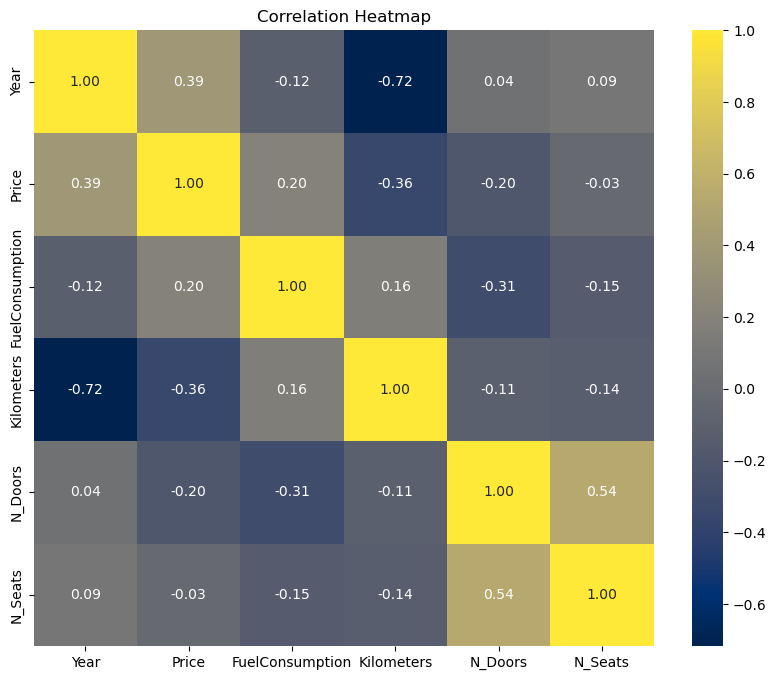

In [19]:
# Calculate correlation matrix for numerical columns
num_cols = ['Year', 'Price', 'FuelConsumption', 'Kilometers', 'N_Doors', 'N_Seats']
corr_matrix = df[num_cols].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='cividis')
plt.title('Correlation Heatmap')

#saving the plot 
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/heatmap.png')
plt.show()


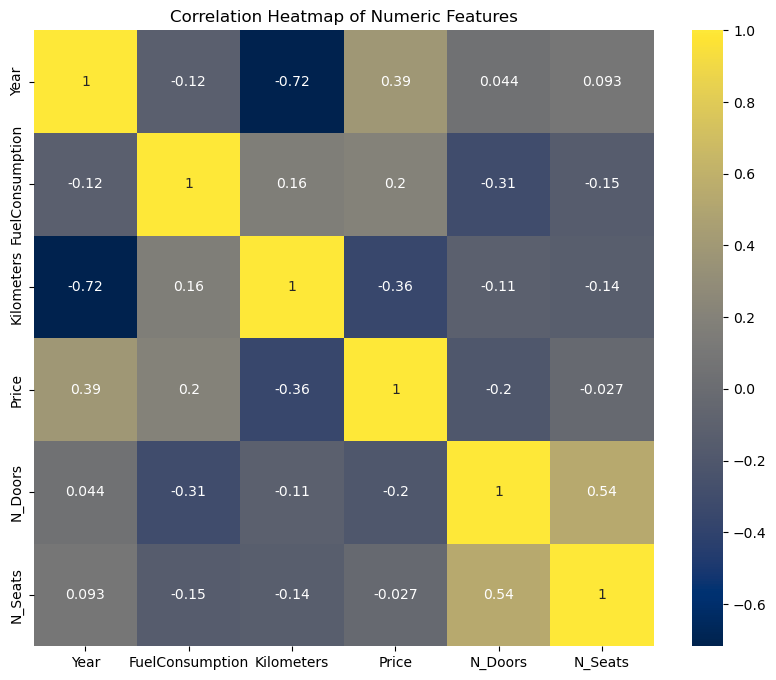

In [20]:
# Creating subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 8))

# Selecting numeric data from the dataframe
df_numeric = df.select_dtypes(include=[np.number])

# Creating the correlation matrix
corr_matrix = df_numeric.corr()

# Creating heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.title('Correlation Heatmap of Numeric Features')


#saving the plot 
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/heatmap_corr.png')
plt.show()


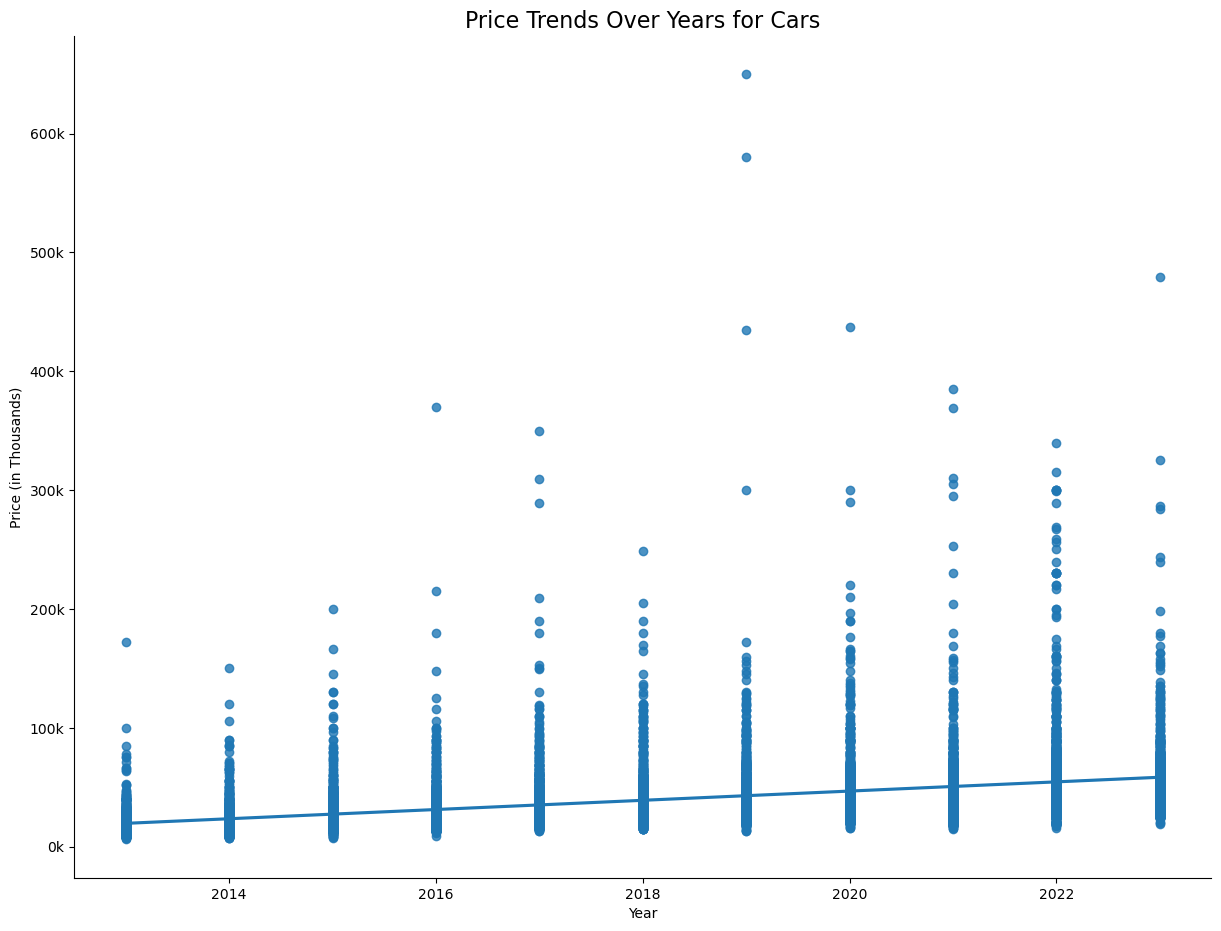

In [21]:
# creating Scatterplot 
sns.lmplot(x='Year', y='Price', data=df, height=10, aspect=1.25)

# setting the title, labels, and format the y-axis
plt.title("Price Trends Over Years for Cars", fontsize=16)
plt.ylabel('Price (in Thousands)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# title
plt.subplots_adjust(top=0.9)


plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Scatterplot.png')

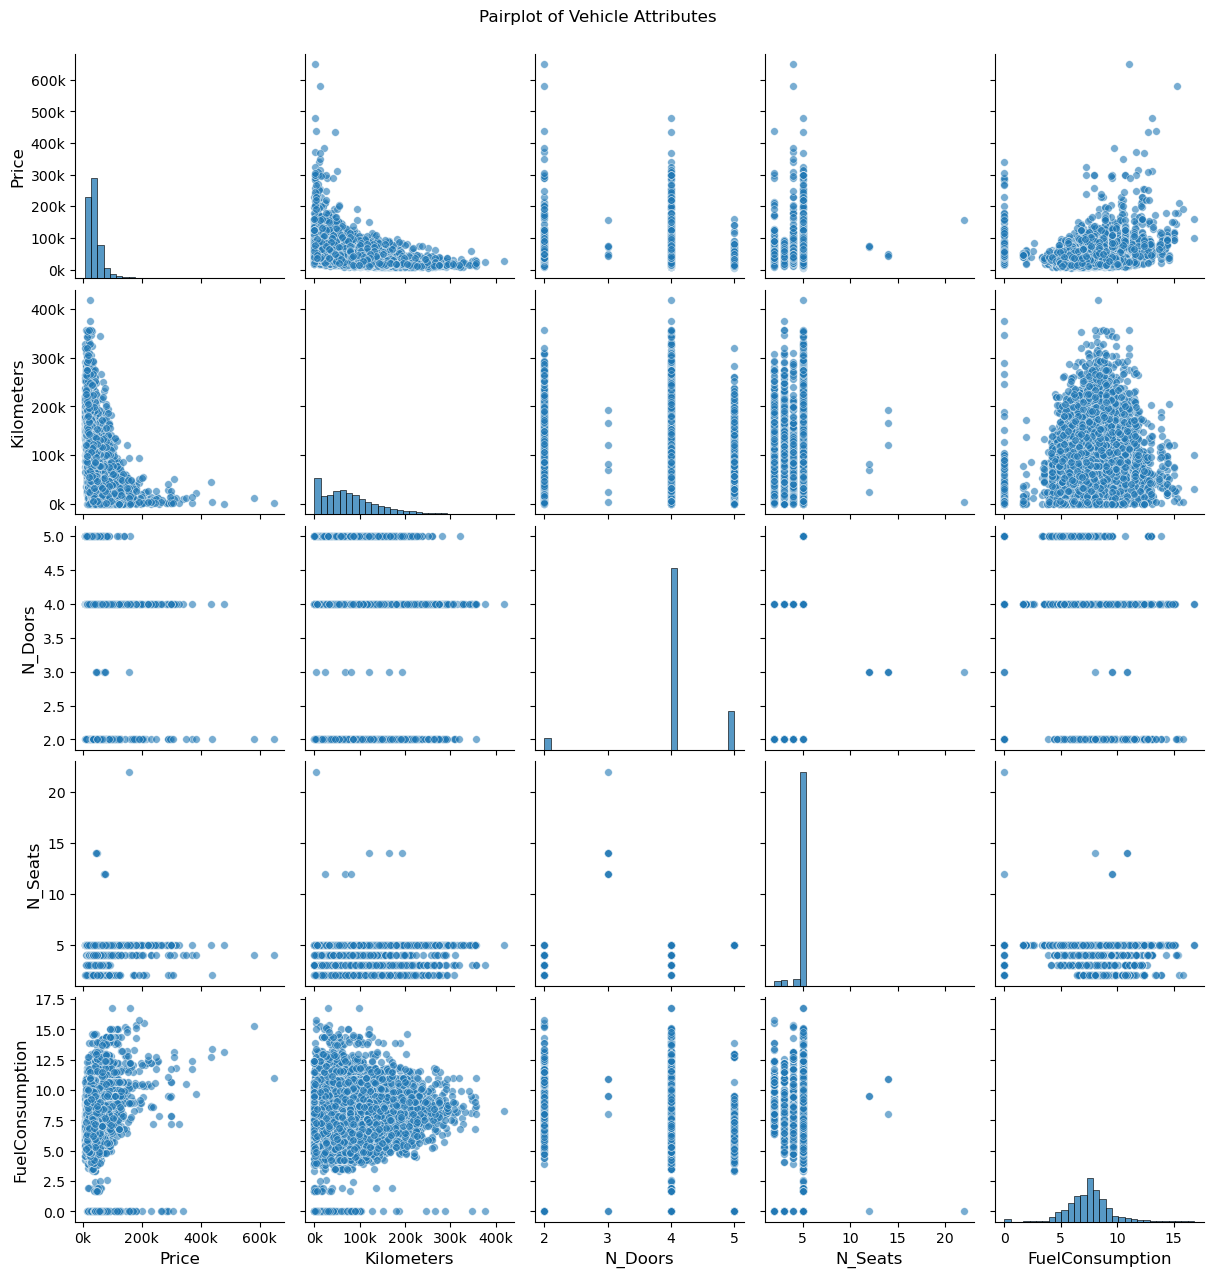

<Figure size 640x480 with 0 Axes>

In [22]:
# Formatter to display numbers in thousands with a 'k' suffix
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k')

columns_to_keep = ['Price', 'Kilometers', 'N_Doors', 'N_Seats', 'FuelConsumption']
sub_new = df[columns_to_keep]

# Pair plot
g = sns.pairplot(sub_new, plot_kws={'alpha': 0.6, 's': 30}, diag_kws={'bins': 30})

# Fixing the titles and labels
g.fig.suptitle('Pairplot of Vehicle Attributes', y=1.02)
for i, col in enumerate(columns_to_keep):
    g.axes[-1][i].set_xlabel(col, fontsize=12)  # Adjusting x-axis labels 
    g.axes[i][0].set_ylabel(col, fontsize=12)  # Adjusting y-axis labels 

# Fixing axes 
for ax in g.axes.flatten():
    if ax.get_xlabel() in ['Price', 'Kilometers']:
        ax.xaxis.set_major_formatter(formatter)
    if ax.get_ylabel() in ['Price', 'Kilometers']:
        ax.yaxis.set_major_formatter(formatter)

# Displaying the plot
plt.show()

# Saving the plot - Make sure the


#saving the plot 
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/pair_plot.png')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

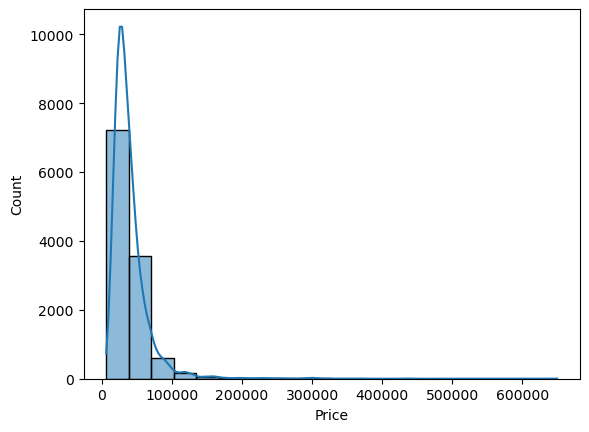

In [23]:
sns.histplot(df['Price'], bins = 20, kde = True)

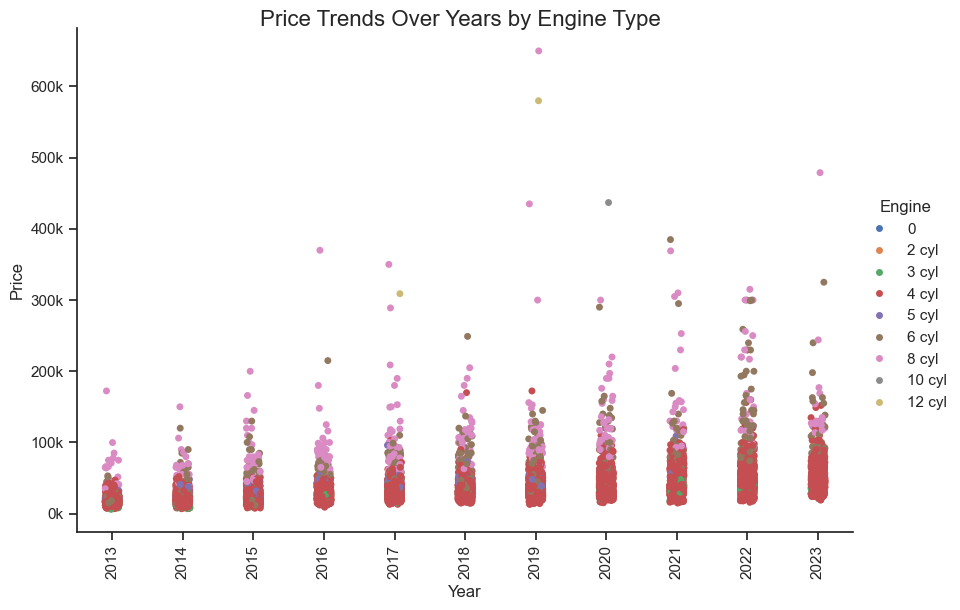

In [24]:
# Removing from 'Engine' values '0 L'

engine_order = ['0', '2 cyl', '3 cyl', '4 cyl', '5 cyl', '6 cyl', '8 cyl', '10 cyl', '12 cyl']
# Set the style of the seaborn plot
sns.set(style="ticks")

# Create the catplot with the ordered 'hue'
g = sns.catplot(
    x="Year", y="Price", hue="Engine", data=df,
    kind="strip", height=6, aspect=1.5, hue_order=engine_order,
)
g.set_xticklabels(rotation=90)

# the y-axis labels to show 'Price' in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#title
g.fig.suptitle("Price Trends Over Years by Engine Type", fontsize=16)
plt.subplots_adjust(top=0.95)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Engine.png')
plt.show()


In [25]:
df['Transmission'].unique()

['Automatic', 'Manual', '-']
Categories (3, object): ['-', 'Automatic', 'Manual']

In [26]:
# Filtering out rows where Transmission is '-'
df_filter = df[df['Transmission'] != '-']

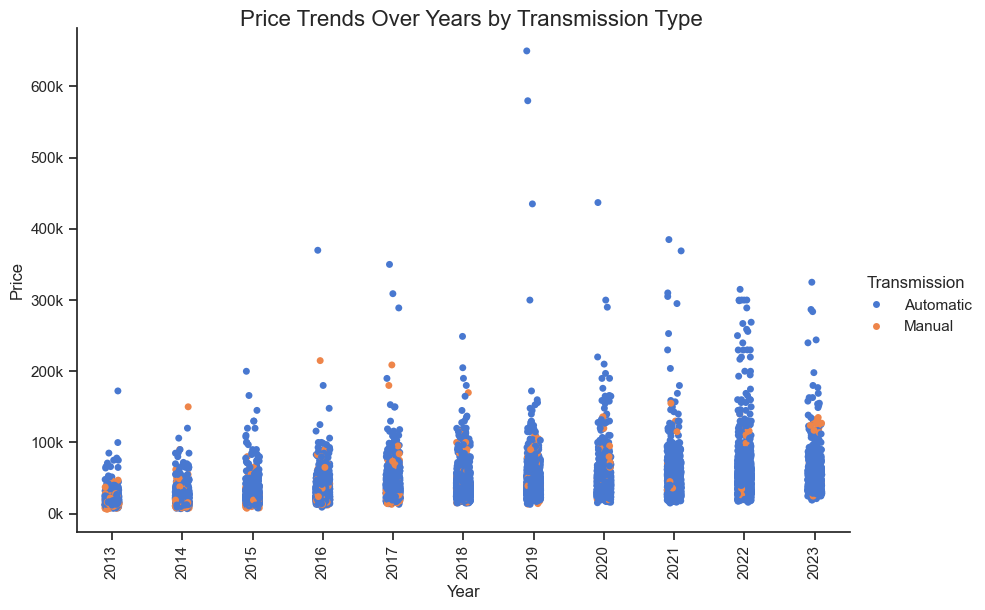

In [27]:
#setting options for Transmission values 
tran_order = ['Automatic', 'Manual']

# Set the style of the seaborn plot
sns.set(style="ticks")

# catplot with the ordered 'hue'
g = sns.catplot(
    x="Year", y="Price", hue="Transmission", hue_order=tran_order, data=df_filter,
    kind="strip", height=6, aspect=1.5, 
    palette='muted' 
)

# rotatting x-axis labels sideways
g.set_xticklabels(rotation=90)

# Making y-axis labels to show 'Price' in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plotting title
g.fig.suptitle("Price Trends Over Years by Transmission Type", fontsize=16)

# Adjusting plot 
plt.subplots_adjust(top=0.95)

#saving to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Trans.png')
plt.show()

In [28]:
df['FuelType'].unique()

['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Electric', 'LPG']
Categories (7, object): ['-', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Premium', 'Unleaded']

In [29]:
df.head()

,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,Kilometers,Location,Engine,BodyType,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New
0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,"Caringbah, NSW",4 cyl,SUV,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales
1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,"Brookvale, NSW",4 cyl,Hatchback,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales
2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,"Sylvania, NSW",4 cyl,Coupe,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales
3,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,"Castle Hill, NSW",4 cyl,SUV,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales
4,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,67662.0,"Blacktown, NSW",4 cyl,SUV,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales


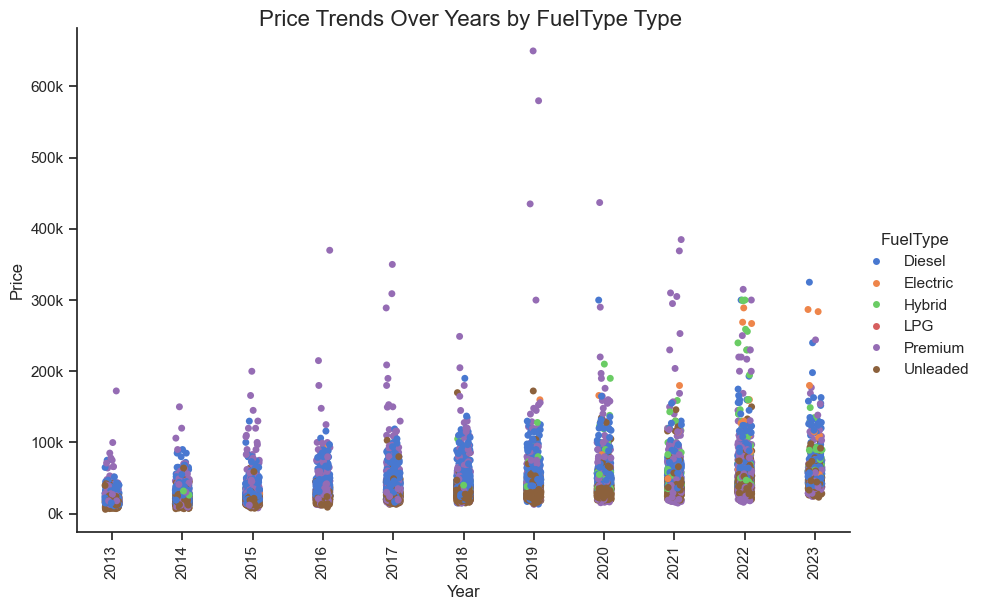

In [30]:
#setting options for Transmission values 
fuel_order = ['Diesel', 'Electric', 'Hybrid', 'LPG', 'Premium', 'Unleaded']

# Set the style of the seaborn plot
sns.set(style="ticks")

# catplot with the ordered 'hue'
g = sns.catplot(
    x="Year", y="Price", hue="FuelType", hue_order=fuel_order, data=df_filter,
    kind="strip", height=6, aspect=1.5, 
    palette='muted' 
)

# rotatting x-axis labels 
g.set_xticklabels(rotation=90)

# Making y-axis labels to show 'Price' in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plotting title
g.fig.suptitle("Price Trends Over Years by FuelType Type", fontsize=16)

# Adjusting plot 
plt.subplots_adjust(top=0.95)

#saving to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Fuel.png')
plt.show()

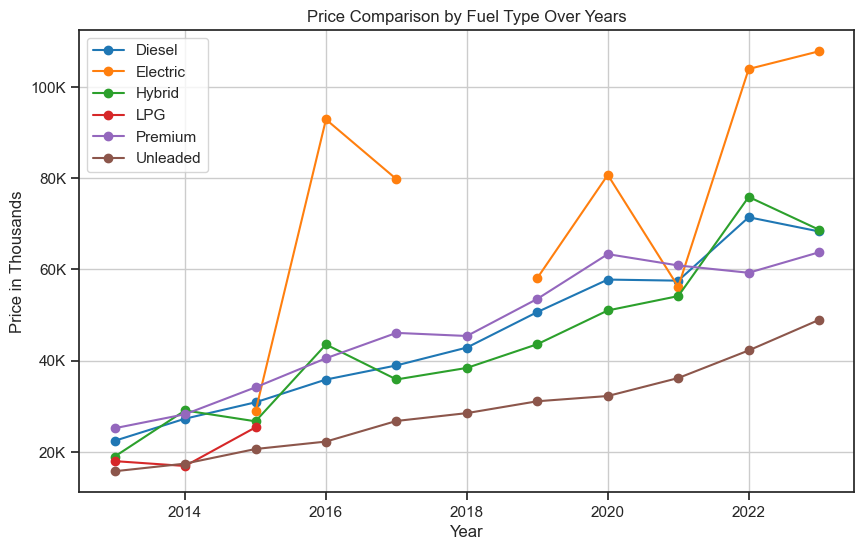

In [42]:


# Filter out rows where 'FuelType' is '-'
data_filtered = df[df['FuelType'] != '-']

data_pivoted = data_filtered.pivot_table(values='Price', index='Year', columns='FuelType', aggfunc='mean', observed=True)

#colormap for distinct fuel types
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))

# Loop through the fuel types and plot each one
for i, fuel_type in enumerate(data_pivoted.columns):
    plt.plot(data_pivoted.index, data_pivoted[fuel_type], label=fuel_type, marker='o', color=cmap(i))

# Set title, labels, and legend
plt.title('Price Comparison by Fuel Type Over Years')
plt.xlabel('Year')
plt.ylabel('Price in Thousands')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Fuel-2.png')



In [43]:
df['FuelType'].unique()

['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Electric', 'LPG']
Categories (7, object): ['-', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Premium', 'Unleaded']

In [44]:
print(df[['FuelCategory']])

           FuelCategory
0      High Consumption
1              Moderate
2              Moderate
3              Moderate
4            Economical
...                 ...
11678          Moderate
11679          Moderate
11680          Moderate
11681          Moderate
11682          Moderate

[11683 rows x 1 columns]


In [45]:
df['BodyType'].unique()

['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan', 'People Mover', 'Convertible', 'Wagon', 'Other']
Categories (10, object): ['Commercial', 'Convertible', 'Coupe', 'Hatchback', ..., 'SUV', 'Sedan', 'Ute / Tray', 'Wagon']

In [46]:
df.head()

,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,Kilometers,Location,Engine,BodyType,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New
0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,"Caringbah, NSW",4 cyl,SUV,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales
1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,"Brookvale, NSW",4 cyl,Hatchback,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales
2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,"Sylvania, NSW",4 cyl,Coupe,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales
3,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,"Castle Hill, NSW",4 cyl,SUV,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales
4,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,67662.0,"Blacktown, NSW",4 cyl,SUV,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales


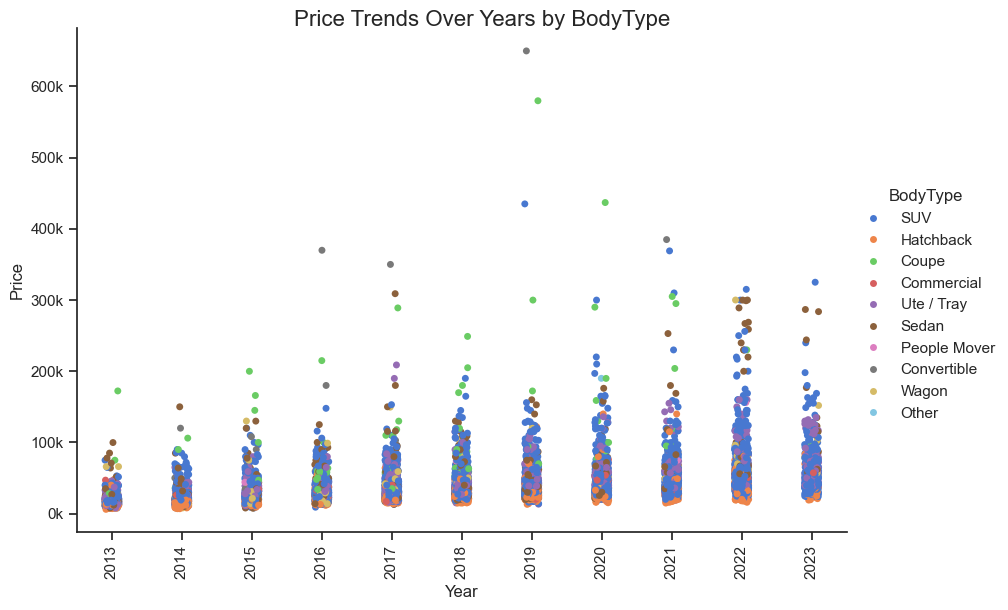

In [47]:
#setting options for Body Type
body_order = ['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan', 'People Mover', 'Convertible', 'Wagon', 'Other']

# Set the style of the seaborn plot
sns.set(style="ticks")

# catplot with the ordered 'hue'
g = sns.catplot(
    x="Year", y="Price", hue="BodyType", hue_order=body_order, data=df_filter,
    kind="strip", height=6, aspect=1.5, 
    palette='muted' 
)

# rotatting x-axis labels sideways
g.set_xticklabels(rotation=90)

# Making y-axis labels to show 'Price' in thousands and adjust the format
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plotting title
g.fig.suptitle("Price Trends Over Years by BodyType", fontsize=16)

# Adjusting plot 
plt.subplots_adjust(top=0.95)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Bodytype.png')
plt.show()


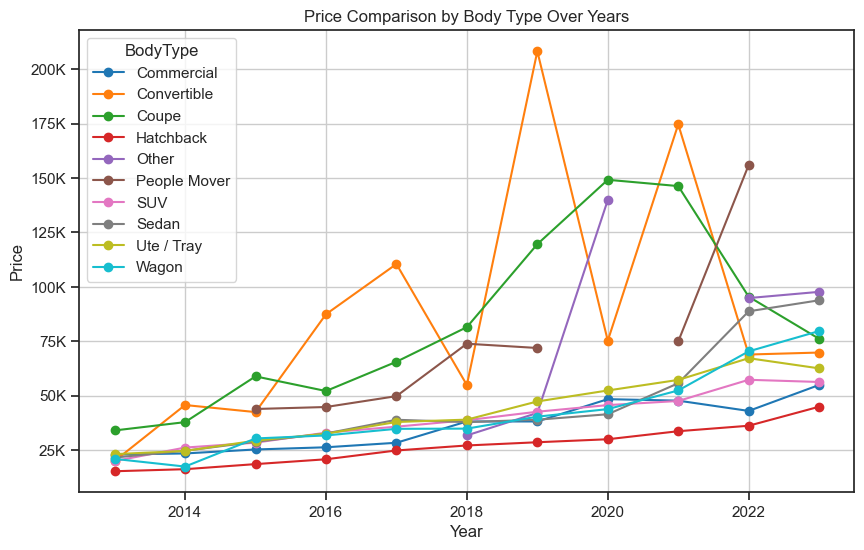

In [48]:
data = pd.read_csv('/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data.csv')

data_pivoted = data.pivot_table(values='Price', index='Year', columns='BodyType', aggfunc='mean')

# Create a colormap 
cmap = plt.get_cmap('tab10')  

plt.figure(figsize=(10, 6))

# Loop through the body types to plot each one
for i, category in enumerate(data_pivoted.columns):
    plt.plot(data_pivoted.index, data_pivoted[category], label=category, marker='o', color=cmap(i))

plt.title('Price Comparison by Body Type Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='BodyType')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.grid(True)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Bodytype_1.png')
plt.show()

In [49]:
df.head()

,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,Kilometers,Location,Engine,BodyType,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New
0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,"Caringbah, NSW",4 cyl,SUV,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales
1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,"Brookvale, NSW",4 cyl,Hatchback,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales
2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,"Sylvania, NSW",4 cyl,Coupe,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales
3,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,"Castle Hill, NSW",4 cyl,SUV,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales
4,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,67662.0,"Blacktown, NSW",4 cyl,SUV,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales


In [50]:
df['DriveType'].unique()

['AWD', 'Front', 'Rear', '4WD', 'Other']
Categories (5, object): ['4WD', 'AWD', 'Front', 'Other', 'Rear']

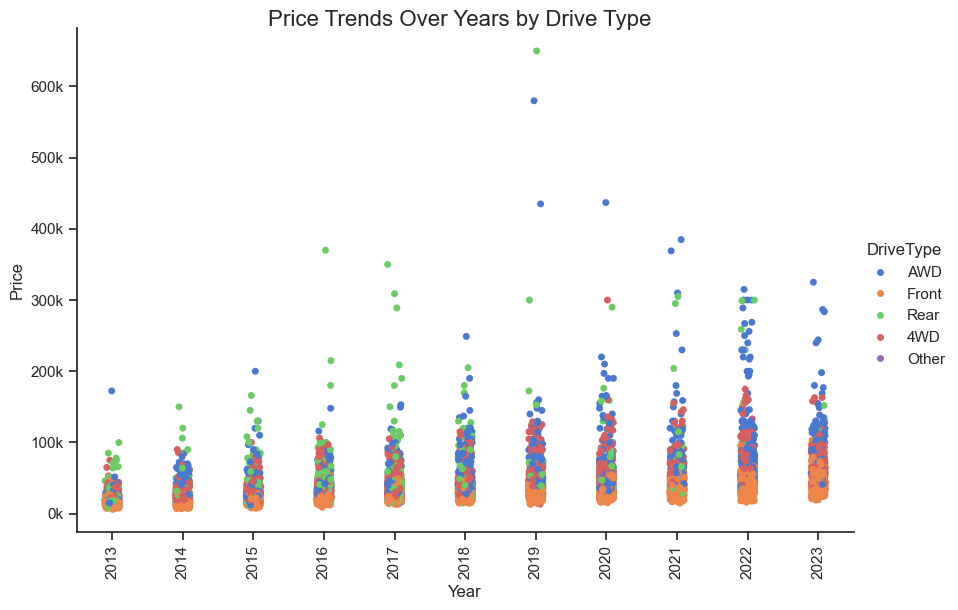

In [51]:
#setting options for Drive Type
drive_order = ['AWD', 'Front', 'Rear', '4WD', 'Other']

# Set the style of the seaborn plot
sns.set(style="ticks")

# catplot with the ordered 'hue'
g = sns.catplot(
    x="Year", y="Price", hue="DriveType", hue_order=drive_order, data=df_filter,
    kind="strip", height=6, aspect=1.5, 
    palette='muted' 
)

# rotatting x-axis labels sideways
g.set_xticklabels(rotation=90)

# Making y-axis labels to show 'Price' in thousands and adjust the format
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Plotting title
g.fig.suptitle("Price Trends Over Years by Drive Type", fontsize=16)

# Adjusting plot 
plt.subplots_adjust(top=0.95)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Drivetype.png')
plt.show()

In [52]:
df.head()

,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,Kilometers,Location,Engine,BodyType,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New
0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,"Caringbah, NSW",4 cyl,SUV,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales
1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,"Brookvale, NSW",4 cyl,Hatchback,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales
2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,"Sylvania, NSW",4 cyl,Coupe,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales
3,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,"Castle Hill, NSW",4 cyl,SUV,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales
4,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,67662.0,"Blacktown, NSW",4 cyl,SUV,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales


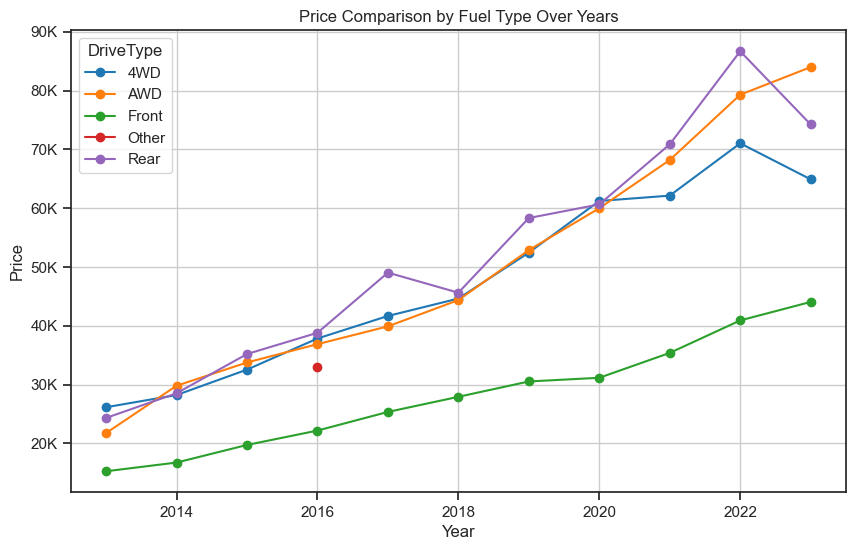

In [53]:
data = pd.read_csv('/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data.csv')

data_pivoted = data.pivot_table(values='Price', index='Year', columns='DriveType', aggfunc='mean')

# Create a colormap 
cmap = plt.get_cmap('tab10')  

plt.figure(figsize=(10, 6))

# Loop through the body types to plot each one
for i, category in enumerate(data_pivoted.columns):
    plt.plot(data_pivoted.index, data_pivoted[category], label=category, marker='o', color=cmap(i))

plt.title('Price Comparison by Fuel Type Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='DriveType')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.grid(True)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Drivetype-1.png')
plt.show()

In [54]:
df['State_New'].unique()

['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 'Australian Capital Territory', 'Tasmania', 'Northern Territory']
Categories (8, object): ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia']

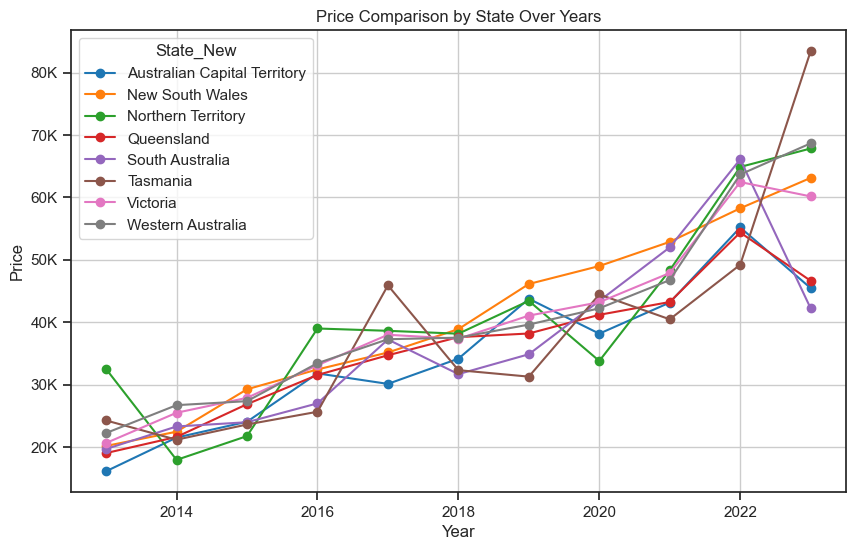

In [55]:
data = pd.read_csv('/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data.csv')

data_pivoted = data.pivot_table(values='Price', index='Year', columns='State_New', aggfunc='mean')

# Create a colormap 
cmap = plt.get_cmap('tab10')  

plt.figure(figsize=(10, 6))

# Loop through the body types to plot each one
for i, category in enumerate(data_pivoted.columns):
    plt.plot(data_pivoted.index, data_pivoted[category], label=category, marker='o', color=cmap(i))

plt.title('Price Comparison by State Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='State_New')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.grid(True)

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_State-1.png')
plt.show()

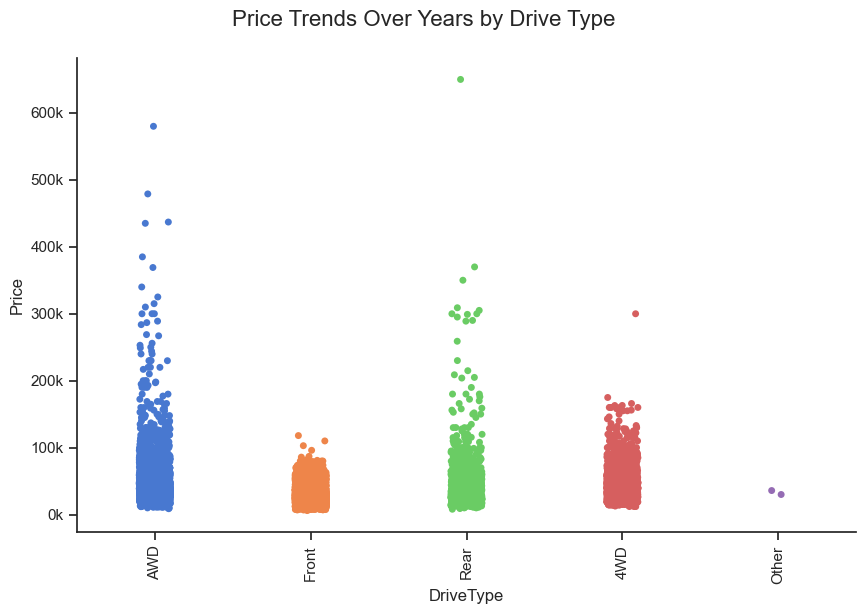

In [56]:
#options for Drive Type
drive_order = ['AWD', 'Front', 'Rear', '4WD', 'Other']

sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="DriveType", y="Price", 
    data=df,  
    order=drive_order,  
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="DriveType", hue_order=drive_order, 
)

# x-axis labels sideways
g.set_xticklabels(rotation=90)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Drive Type", fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Drivetype-1.png')
plt.show()

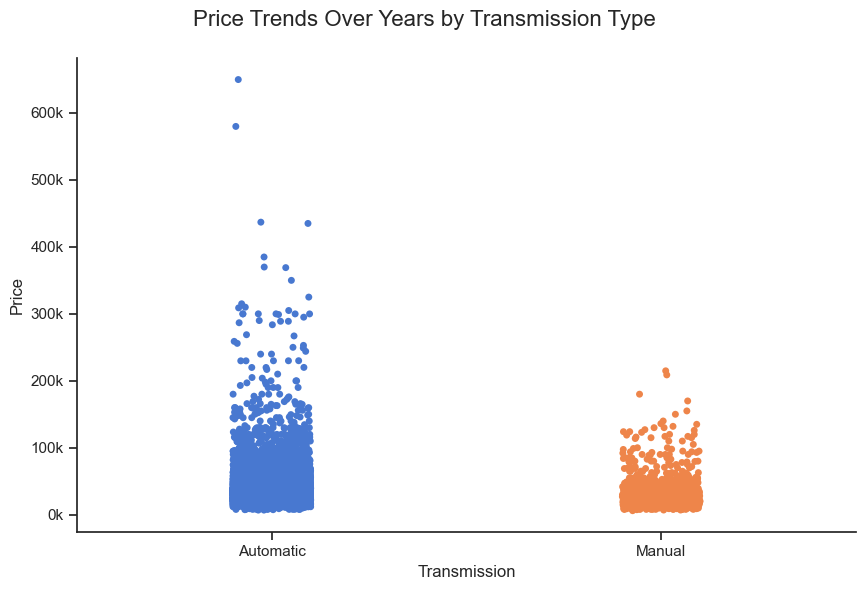

In [57]:
#options for Transmission Type
trans_order = ['Automatic', 'Manual']

sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="Transmission", y="Price", 
    data=df, 
    order=trans_order,
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="Transmission", hue_order=trans_order, 
   
)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Transmission Type", fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_TransType-2.png')
plt.show()

In [58]:
df['Engine'].unique()

['4 cyl', '3 cyl', '6 cyl', '5 cyl', '8 cyl', '0 L', '2 cyl', '12 cyl', '10 cyl']
Categories (9, object): ['0 L', '10 cyl', '12 cyl', '2 cyl', ..., '4 cyl', '5 cyl', '6 cyl', '8 cyl']

In [59]:
df_filtered = df[df['Engine'] != '0 L']

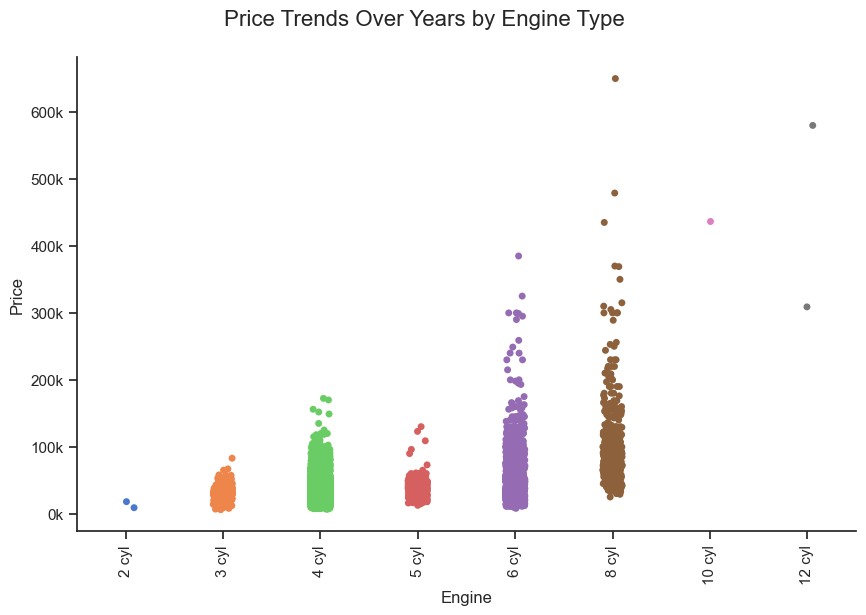

In [60]:
#options for Engine Type
engine_order = ['2 cyl', '3 cyl', '4 cyl', '5 cyl', '6 cyl', '8 cyl', '10 cyl', '12 cyl']

sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="Engine", y="Price", 
    data=df, 
    order=engine_order,
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="Engine", hue_order=engine_order, 
   
)

# x-axis labels sideways
g.set_xticklabels(rotation=90)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Engine Type", fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_Engine-3.png')
plt.show()

In [61]:
df['FuelType'].unique()

['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Electric', 'LPG']
Categories (7, object): ['-', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Premium', 'Unleaded']

In [62]:
# Filtering out rows where Transmission is '-'
df_filter = df[df['FuelType'] != '-']

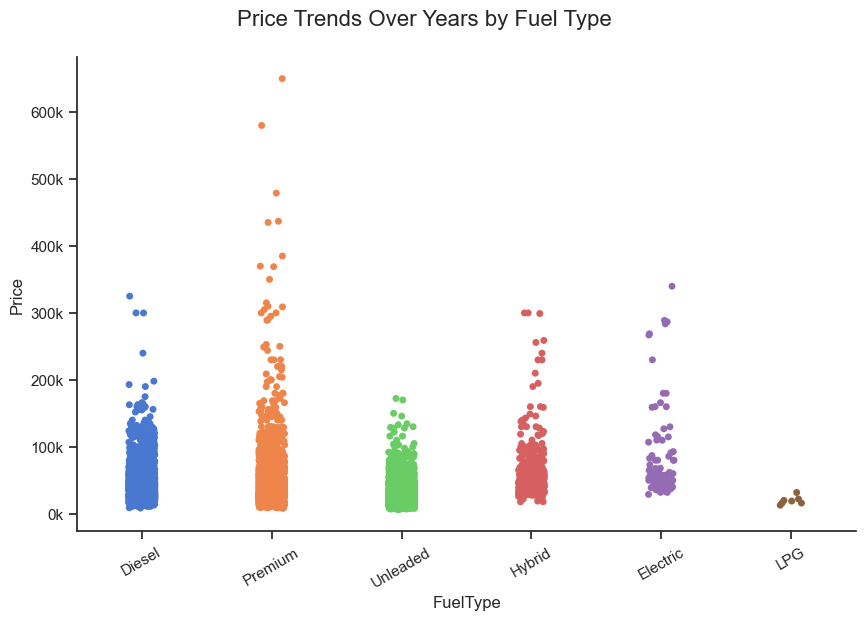

In [63]:
#options for Fuel Type
fuel_order = ['Diesel', 'Premium', 'Unleaded', 'Hybrid', 'Electric', 'LPG']
sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="FuelType", y="Price", 
    data=df, 
    order=fuel_order,
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="FuelType", hue_order=fuel_order, 
   
)

# x-axis labels sideways
g.set_xticklabels(rotation=30)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Fuel Type", fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_FuelType-3.png')
plt.show()

In [64]:
df['BodyType'].unique()

['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan', 'People Mover', 'Convertible', 'Wagon', 'Other']
Categories (10, object): ['Commercial', 'Convertible', 'Coupe', 'Hatchback', ..., 'SUV', 'Sedan', 'Ute / Tray', 'Wagon']

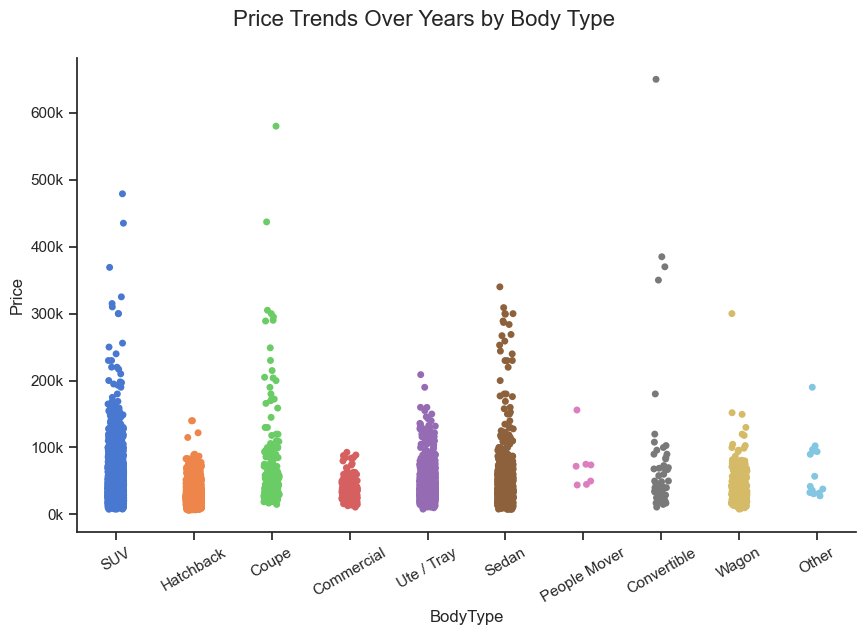

In [65]:
#options for Body Type
body_order = ['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan', 'People Mover', 'Convertible', 'Wagon', 'Other']
sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="BodyType", y="Price", 
    data=df, 
    order=body_order,
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="BodyType", hue_order=body_order, 
   
)

# x-axis labels sideways
g.set_xticklabels(rotation=30)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Body Type", fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_BodyType-3.png')
plt.show()

In [66]:
df['FuelCategory'].unique()

['High Consumption', 'Moderate', 'Economical']
Categories (3, object): ['Economical', 'High Consumption', 'Moderate']

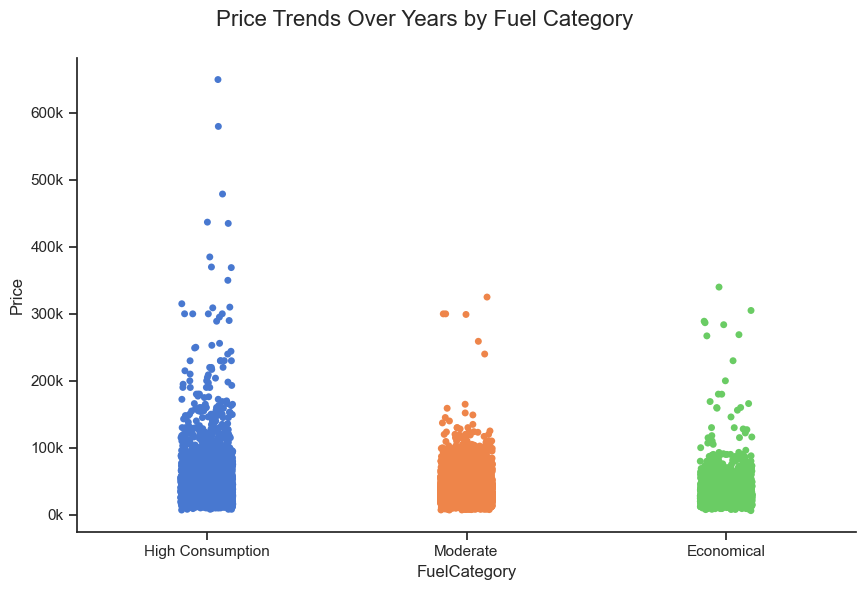

In [117]:
#options for 
catg_order = ['High Consumption', 'Moderate', 'Economical']
sns.set(style="ticks")
#plotting chart 
g = sns.catplot(
    x="FuelCategory", y="Price", 
    data=df, 
    order=catg_order,
    kind="strip", height=6, aspect=1.5,
    palette='muted', hue="FuelCategory", hue_order=catg_order, 
   
)

# showing y-axis in thousands 
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# tittle
g.fig.suptitle("Price Trends Over Years by Fuel Category", fontsize=16)
g.fig.subplots_adjust(top=0.9) 
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Price_vs_Year_FuelCatg-3.png')
plt.show()